# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader*

- Anaconda prompt: ejecutar como administrador

https://pandas-datareader.readthedocs.io/en/latest/

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ver la siguiente función...

In [2]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    #closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
    #closes.set_axis(closes.loc['date',:,ticker[0]].values, axis=1, inplace=True)
    #closes = closes.loc['adjclose'].sort_index().dropna()
    #closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
    #closes.index.name = 'Date'
    return pd.DataFrame(closes.loc[:, 'Adj Close'])
    #return closes

In [3]:
# Definimos los instrumentos que vamos a descargar. Tendremos Apple, Amazon, Microsoft y Nvidia.
ticker = 'AAPL'
# Queremos los datos desde 01/01/2011 hasta 31/12/2016.
start_date = '2011-01-01'
end_date = '2016-12-31'
# Usamos la función anterior. Si, así de fácil...
closes = get_historical_closes(ticker, start_date, end_date)

¿Qué contiene esta variable?

In [4]:
closes.columns = ['AAPL']
closes

,AAPL
Date,
2011-01-03,31.273602
2011-01-04,31.436827
2011-01-05,31.693975
2011-01-06,31.668356
2011-01-07,31.895151
2011-01-10,32.495808
2011-01-11,32.418953
2011-01-12,32.682755
2011-01-13,32.802319


¿Cómo lucen estos datos?

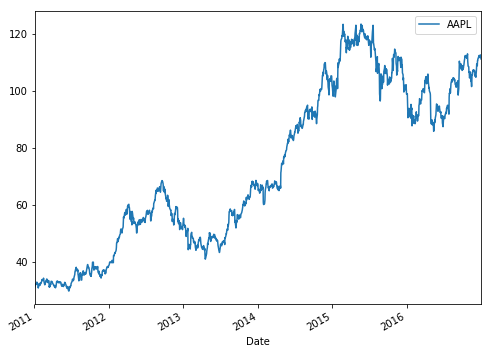

In [5]:
closes.plot(figsize=(8,6));

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [6]:
closes.describe()

,AAPL
count,1510.000000
mean,73.037422
std,28.734034
min,29.921387
25%,48.357914
50%,66.182083
75%,101.467516
max,123.607811


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [7]:
closes.shift(1)

,AAPL
Date,
2011-01-03,NaN
2011-01-04,31.273602
2011-01-05,31.436827
2011-01-06,31.693975
2011-01-07,31.668356
2011-01-10,31.895151
2011-01-11,32.495808
2011-01-12,32.418953
2011-01-13,32.682755


In [8]:
R = ((closes - closes.shift(1))/closes.shift(1)).dropna()
R

,AAPL
Date,
2011-01-04,0.005219
2011-01-05,0.008180
2011-01-06,-0.000808
2011-01-07,0.007162
2011-01-10,0.018832
2011-01-11,-0.002365
2011-01-12,0.008137
2011-01-13,0.003658
2011-01-14,0.008100


In [9]:
R = closes.pct_change(1).dropna()
R

,AAPL
Date,
2011-01-04,0.005219
2011-01-05,0.008180
2011-01-06,-0.000808
2011-01-07,0.007162
2011-01-10,0.018832
2011-01-11,-0.002365
2011-01-12,0.008137
2011-01-13,0.003658
2011-01-14,0.008100


y la gráfica de los rendimientos se puede obtener como...

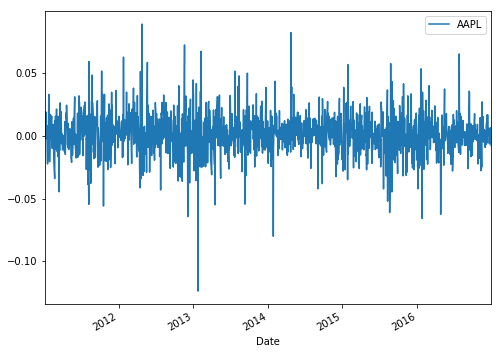

In [10]:
R.plot(figsize=(8,6));

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [11]:
r = np.log(closes/closes.shift(1)).dropna()
r

,AAPL
Date,
2011-01-04,0.005206
2011-01-05,0.008147
2011-01-06,-0.000809
2011-01-07,0.007136
2011-01-10,0.018657
2011-01-11,-0.002368
2011-01-12,0.008104
2011-01-13,0.003652
2011-01-14,0.008068


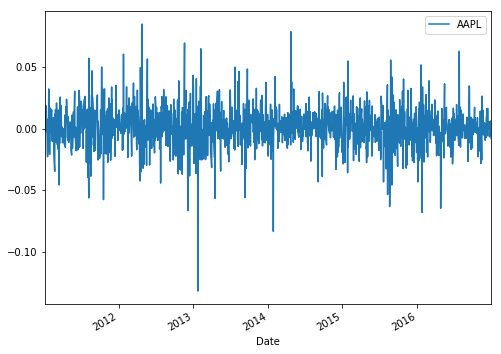

In [12]:
r.plot(figsize=(8,6));

In [13]:
np.abs(R-r)

,AAPL
Date,
2011-01-04,1.357315e-05
2011-01-05,3.327370e-05
2011-01-06,3.268829e-07
2011-01-07,2.552227e-05
2011-01-10,1.751309e-04
2011-01-11,2.801184e-06
2011-01-12,3.292902e-05
2011-01-13,6.675386e-06
2011-01-14,3.263047e-05


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [14]:
mu = r.mean().AAPL
sigma = r.std().AAPL
mu, sigma

(0.000841805826142802, 0.016646893355014146)

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Xiuhcoatl.
</footer>